## 신경망 모델 훈련 
- EarlyStopping  
- Dropout  
- CheckPoint  

### 사용 데이터 : mnist 데이터셋
- 정규화만 수행하고, 
- 레이블 인코딩 수행하지 않고 정수값 그대로 사용   
- loss='sparse_categorical_crossentropy'    

### (1) 데이터 준비 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np

In [3]:
# 데이터 로드 
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train2 = X_train.reshape(60000, 28*28)
X_train2 = X_train2 / 255

X_test2 = X_test.reshape(10000, 28*28)
X_test2 = X_test2 / 255

In [6]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### (3) 모델링 

#### 모델링 순서  
(1) 모델 설정   
(2) 모델 컴파일   
(3) 모델 학습(실행)   
(4) 모델 평가(결과 출력)  

### Eary Stopping과 Dropout 적용하지 않은 경우

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

# (1) 모델 설정

model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# (2) 컴파일
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

# (3) 모델 학습 (실행)
epochs = 100
batch_size = 128

history = model.fit(X_train2, y_train, 
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test2, y_test))


C:\Users\82108\anaconda3\envs\DLenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8719 - loss: 0.4410 - val_accuracy: 0.9604 - val_loss: 0.1305
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9649 - loss: 0.1189 - val_accuracy: 0.9731 - val_loss: 0.0905
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9789 - loss: 0.0739 - val_accuracy: 0.9759 - val_loss: 0.0761
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9855 - loss: 0.0511 - val_accuracy: 0.9794 - val_loss: 0.0689
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9899 - loss: 0.0366 - val_accuracy: 0.9799 - val_loss: 0.0653
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9935 - loss: 0.0265 - val_accuracy: 0.9812 - val_loss: 0.0636
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9959 - loss: 0.0190 - val_accuracy: 0.9825 - val_loss: 0.0625
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9972 - loss: 0.0136 - val_accu

In [8]:
# (4) 모델 평가 (결과 출력)

loss, accuracy = model.evaluate(X_test2, y_test)

print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}') 


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9818 - loss: 0.1014     
정확도: 0.9843, 손실: 0.0821


<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

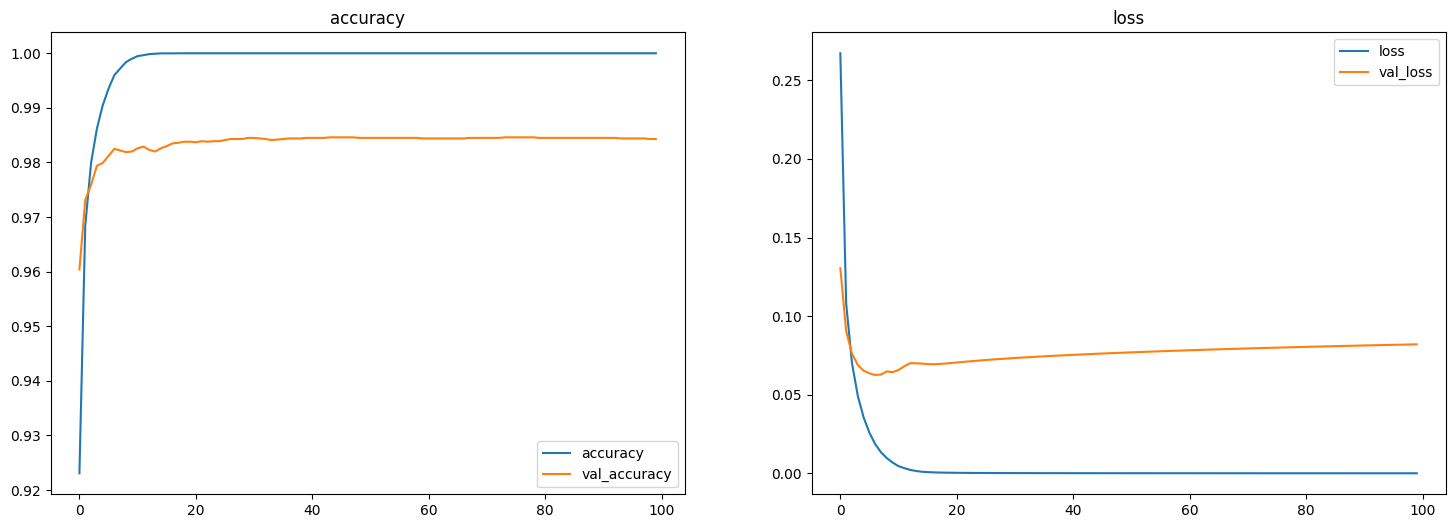

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt. figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

In [ ]:
########################################################################

### Early Stopping 적용

In [16]:
# Early Stopping 적용

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from keras.callbacks import EarlyStopping

tf.random.set_seed(3)


model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

# EarlyStopping 적용
early_stopping_callback = EarlyStopping(patience=2, restore_best_weights=True)


# (3) 모델 학습 (실행)
epochs = 100
batch_size = 128

history = model.fit(X_train2, y_train,
                   epochs = epochs,
                   batch_size=batch_size,
                   validation_data=(X_test2,y_test),
                   callbacks=[early_stopping_callback],
                   )


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8666 - loss: 0.4634 - val_accuracy: 0.9613 - val_loss: 0.1331
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9579 - loss: 0.1402 - val_accuracy: 0.9704 - val_loss: 0.0983
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9709 - loss: 0.0959 - val_accuracy: 0.9757 - val_loss: 0.0798
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9774 - loss: 0.0749 - val_accuracy: 0.9783 - val_loss: 0.0692
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9816 - loss: 0.0599 - val_accuracy: 0.9784 - val_loss: 0.0690
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9840 - loss: 0.0515 - val_accuracy: 0.9812 - val_loss: 0.0616
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9866 - loss: 0.0448 - val_accuracy: 0.9808 - val_loss: 0.0625
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9879 - loss: 0.0387 - val_accu

In [20]:
# (4) 모델 평가 (결과 출력)
# acc, loss
loss, accuracy = model.evaluate(X_test2, y_test)

print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}') 
# 조기종료 하지않았을때의 손실 : 0.0821
# 조기종료 했을때의 손실 : 0.0639
# 조기종료 + dropout 층까지 추가 했을때 0.0606

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9763 - loss: 0.0741 
정확도: 0.9809, 손실: 0.0606


<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

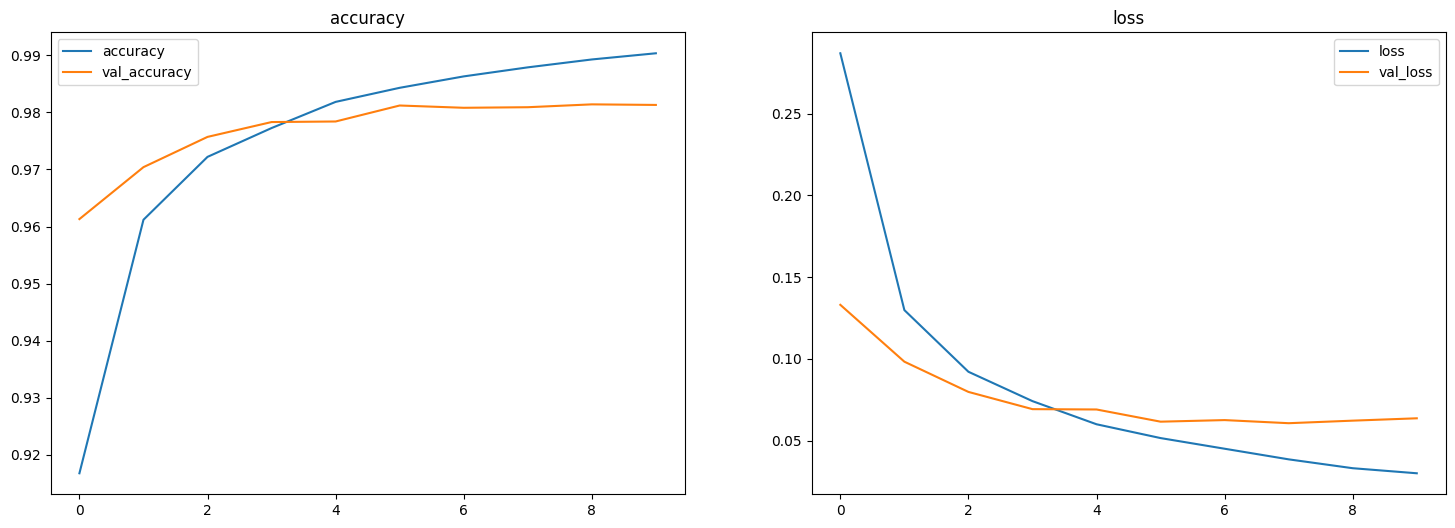

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt. figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

In [ ]:
###########################################################################

### Drop Out 적용 

### Dropout만 적용한 경우 

In [21]:
# Dropout만 적용한 경우

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

tf.random.set_seed(3)

model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
# dropout층을 추가
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

# (3) 모델 학습 (실행)
epochs = 100
batch_size = 128

history = model.fit(X_train2, y_train, 
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test2, y_test))
# 학습 과정 결과를 history 객체에 저장
# validation_data 지정해야 함 : 없으면 val_accuracy, val_loss 반환 없음 


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8616 - loss: 0.4698 - val_accuracy: 0.9571 - val_loss: 0.1392
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9577 - loss: 0.1410 - val_accuracy: 0.9708 - val_loss: 0.0961
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9712 - loss: 0.0958 - val_accuracy: 0.9762 - val_loss: 0.0765
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9778 - loss: 0.0737 - val_accuracy: 0.9780 - val_loss: 0.0706
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9818 - loss: 0.0596 - val_accuracy: 0.9806 - val_loss: 0.0632
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9840 - loss: 0.0509 - val_accuracy: 0.9815 - val_loss: 0.0595
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9871 - loss: 0.0435 - val_accuracy: 0.9813 - val_loss: 0.0585
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9882 - loss: 0.0372 - val_accu

In [26]:
# (4) 모델 평가 (결과 출력)
# acc, loss
loss, accuracy = model.evaluate(X_test2, y_test)

print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}') 

# EarlyStopping / Dropout 적용하지 않은 경우
# 정확도: 0.9849, 손실: 0.0784
# val_loss: 0.0784 - val_accuracy: 0.9849

# EarlyStopping 적용한 경우 
# 정확도: 0.9822, 손실: 0.0624
# val_loss: 0.0675 - val_accuracy: 0.9810

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9795 - loss: 0.0660 
정확도: 0.9826, 손실: 0.0552


<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

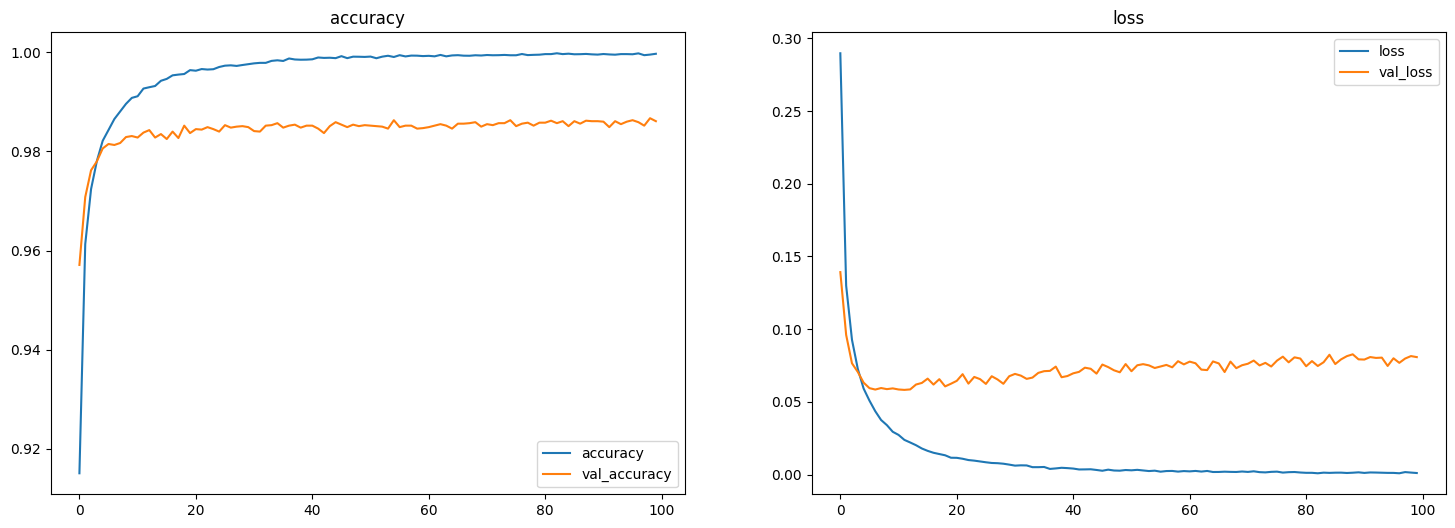

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt. figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

### Dropout + Early Stopping 둘 다 적용한 경우

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from keras.callbacks import EarlyStopping

tf.random.set_seed(3)

# (1) 모델 설정

model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
# dropout층을 추가
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# (2) 컴파일
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

# EarlyStopping 적용
early_stopping_callback = EarlyStopping(patience=2, restore_best_weights=True)


# (3) 모델 학습 (실행)
epochs = 100
batch_size = 128

history = model.fit(X_train2, y_train,
                   epochs = epochs,
                   batch_size=batch_size,
                   validation_data=(X_test2,y_test),
                   callbacks=[early_stopping_callback],
                   )

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8597 - loss: 0.4764 - val_accuracy: 0.9595 - val_loss: 0.1365
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9578 - loss: 0.1412 - val_accuracy: 0.9721 - val_loss: 0.0918
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9715 - loss: 0.0958 - val_accuracy: 0.9754 - val_loss: 0.0793
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9776 - loss: 0.0738 - val_accuracy: 0.9783 - val_loss: 0.0693
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9821 - loss: 0.0595 - val_accuracy: 0.9803 - val_loss: 0.0622
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9840 - loss: 0.0513 - val_accuracy: 0.9815 - val_loss: 0.0620
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9861 - loss: 0.0444 - val_accuracy: 0.9819 - val_loss: 0.0603
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9878 - loss: 0.0391 - val_accu

In [25]:
# (4) 모델 평가 (결과 출력)
# acc, loss
loss, accuracy = model.evaluate(X_test2, y_test)

print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}') 

# EarlyStopping / Dropout 적용하지 않은 경우
# 정확도: 0.9849, 손실: 0.0784
# val_loss: 0.0784 - val_accuracy: 0.9849

# EarlyStopping 적용한 경우 
# 정확도: 0.9822, 손실: 0.0624
# val_loss: 0.0675 - val_accuracy: 0.9810

# Dropout만 적용한 경우
# 정확도: 0.9848, 손실: 0.0900
# val_loss: 0.0900 - val_accuracy: 0.9848

# Dropout + Early Stopping 둘 다 적용한 경우
# 정확도: 0.9826, 손실: 0.0552

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9795 - loss: 0.0660 
정확도: 0.9826, 손실: 0.0552


In [ ]:
############################################################################

### CheckPoint

In [29]:
# Early Stopping 적용 
# CheckPoint 설정

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint

tf.random.set_seed(3)

model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

# CheckPoint 설정
check_pointer = ModelCheckpoint("./model/best_model_mnist.keras")
# EarlyStopping 적용
early_stopping_callback = EarlyStopping(patience=2, restore_best_weights=True)

# (3) 모델 학습 (실행)
epochs = 100
batch_size = 128

history = model.fit(X_train2, y_train, 
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test2, y_test),
                    callbacks=[check_pointer, early_stopping_callback])

C:\Users\82108\anaconda3\envs\DLenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8705 - loss: 0.4419 - val_accuracy: 0.9614 - val_loss: 0.1308
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9655 - loss: 0.1192 - val_accuracy: 0.9734 - val_loss: 0.0887
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9786 - loss: 0.0736 - val_accuracy: 0.9781 - val_loss: 0.0737
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9857 - loss: 0.0506 - val_accuracy: 0.9794 - val_loss: 0.0669
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9902 - loss: 0.0361 - val_accuracy: 0.9806 - val_loss: 0.0642
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9934 - loss: 0.0259 - val_accuracy: 0.9810 - val_loss: 0.0625
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9960 - loss: 0.0185 - val_accuracy: 0.9810 - val_loss: 0.0627
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9975 - loss: 0.0132 - val_accu

In [30]:
# 저장된 베스트 모델 불러오기
from tensorflow.keras.models import load_model

best_model = load_model('./model/best_model_mnist.keras')

In [31]:
# 베스트 모델로 평가 수행 
model.evaluate(X_test2, y_test)       # [0.06178359314799309, 0.9821000099182129] - loss: 0.0618 - accuracy: 0.9821
best_model.evaluate(X_test2, y_test)  # [0.0683005154132843,  0.9800000190734863] - loss: 0.0683 - accuracy: 0.9800

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9783 - loss: 0.0724 


[0.06252472847700119, 0.9810000061988831]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9797 - loss: 0.0732   


[0.06329772621393204, 0.9819999933242798]